---
title: "Homework-3"
author: "Brian Kwon"
format: 
    html: 
        embed-resources: true
---

## Problem-1

Let $X \sim B(80, .2)$ and $Y \sim B(100, .7)$ be independent binomial random variables. Let $Z = X + Y$ . Find the following conditional quantities, using R simulations:

* (a) $P(X < 12|X < 18)$ and $E(X|X < 18)$  
* (b) the cumulative distribution function of $X|(12 \le X \le 20)$ (plot of the ecdf) 
* (c) the cumulative distribution function of $X|Z = 90$ ( plot of the ecdf ) 
* (d) $E(Z|X = k)$ for $k = 10, 15, 20$.  
* (e) $E(X|Z = k)$ for $k = 80, 90, 100$. 



In [17]:
X = rbinom(100000,80,0.2)
Y = rbinom(100000,100,0.7)
Z = X+Y

In [18]:
# (a)
cat("P(X < 12|X < 18) =",length(X[X<12])/length(X[X<18]))

P(X < 12|X < 18) = 0.1498143

In [11]:
# (a)
cat("E(X|X < 18) =",mean(X[X<18]))

E(X|X < 18) = 14.04198

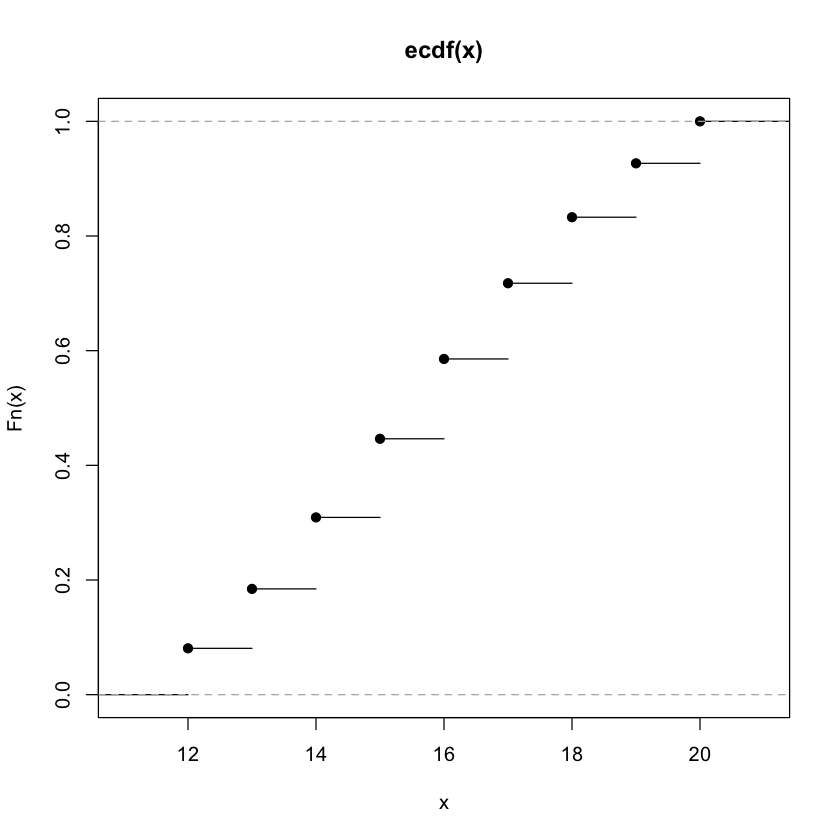

In [70]:
# (b)
plot.ecdf(X[X <= 20 & X >= 12])

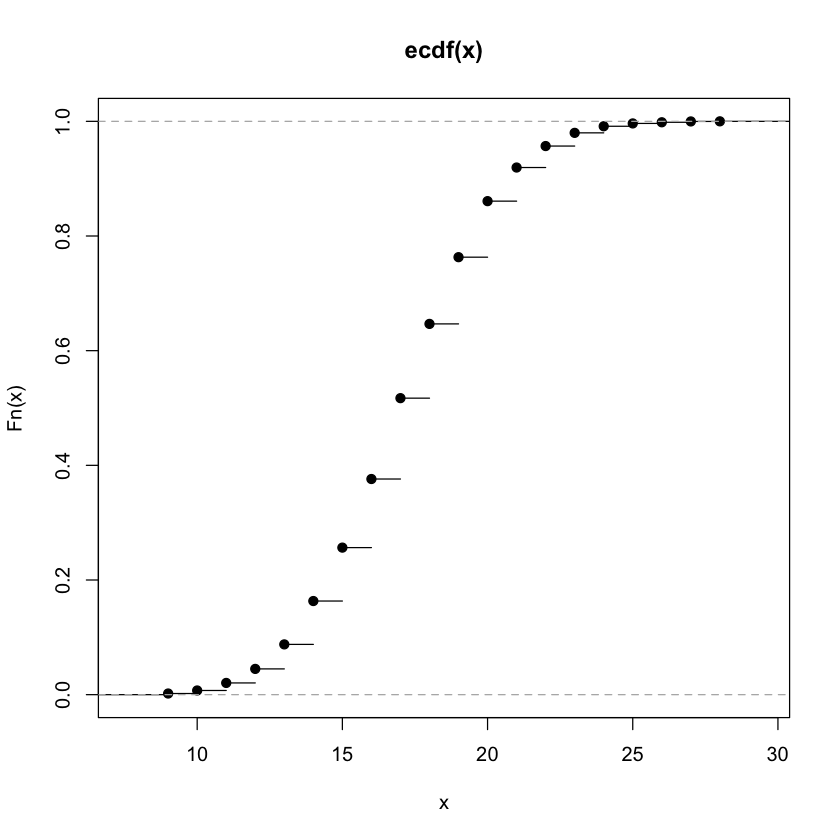

In [71]:
# (c)
plot.ecdf(X[Z == 90])

In [16]:
# (d)
cat("E(Z|X = 10) =",mean(Z[X==10]),"\n")
cat("E(Z|X = 15) =",mean(Z[X==15]),"\n")
cat("E(Z|X = 20) =",mean(Z[X==20]))

E(Z|X = 10) = 80.01978 
E(Z|X = 15) = 84.99363 
E(Z|X = 20) = 90.09391

In [20]:
# (e)
cat("E(X|Z = 80) =",mean(X[Z==80]),"\n")
cat("E(X|Z = 90) =",mean(X[Z==90]),"\n")
cat("E(X|Z = 100) =",mean(X[Z==100]))

E(X|Z = 80) = 13.69629 
E(X|Z = 90) = 17.46345 
E(X|Z = 100) = 21.94215

## Problem-2

Suppose $X$ has an exponential distribution with parameter $\lambda = 1$ and  $Y|X = x$ has a Poisson distribution with parameter $x$. 

* (a) Generate at least 1000 random samples from the marginal distribution of $X$ and make a probability histogram. 
* (b) Generate at least 1000 random samples from the conditional distribution of $Y|X = 1.5$ and make a probability histogram.  
* (c) Generate at least 1000 random samples from the marginal distribution of $Y$ and make a probability histogram. 
* (d) Generate at least 1000 random samples from the conditional distribution of $X|Y=2$ and make a probability histogram. 



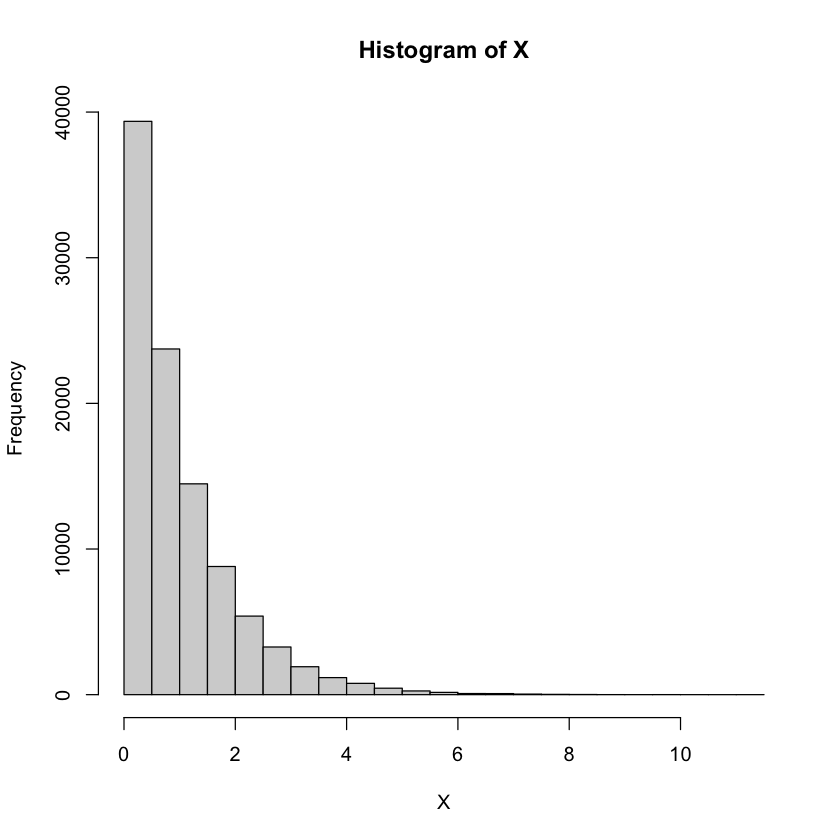

In [28]:
# (a)
X = rexp(100000,1)
hist(X)

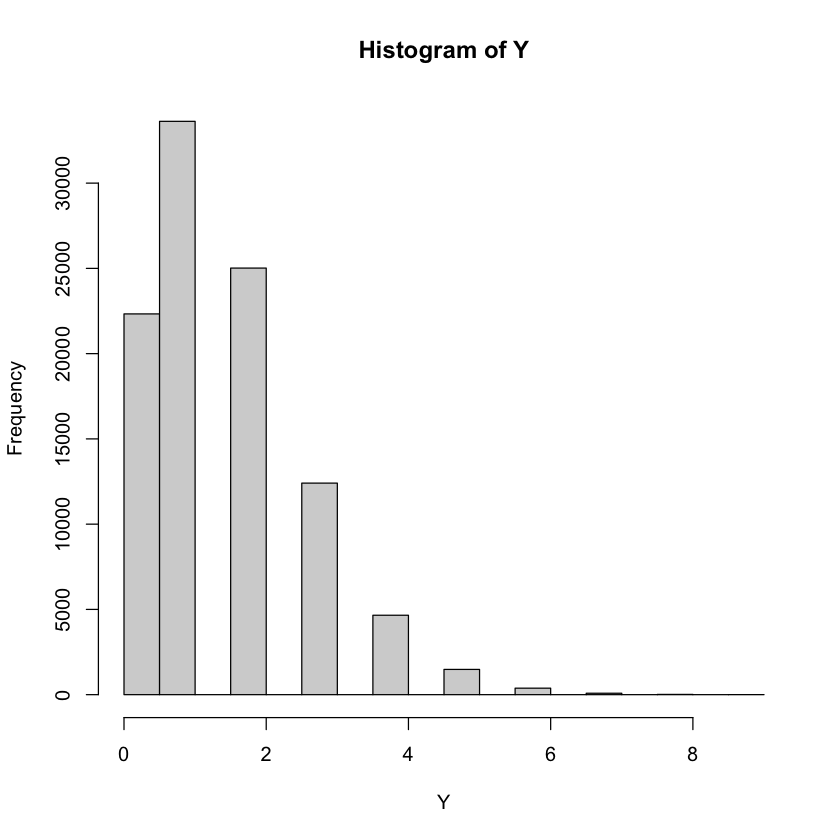

In [29]:
# (b)
Y = rpois(100000,1.5)
hist(Y)

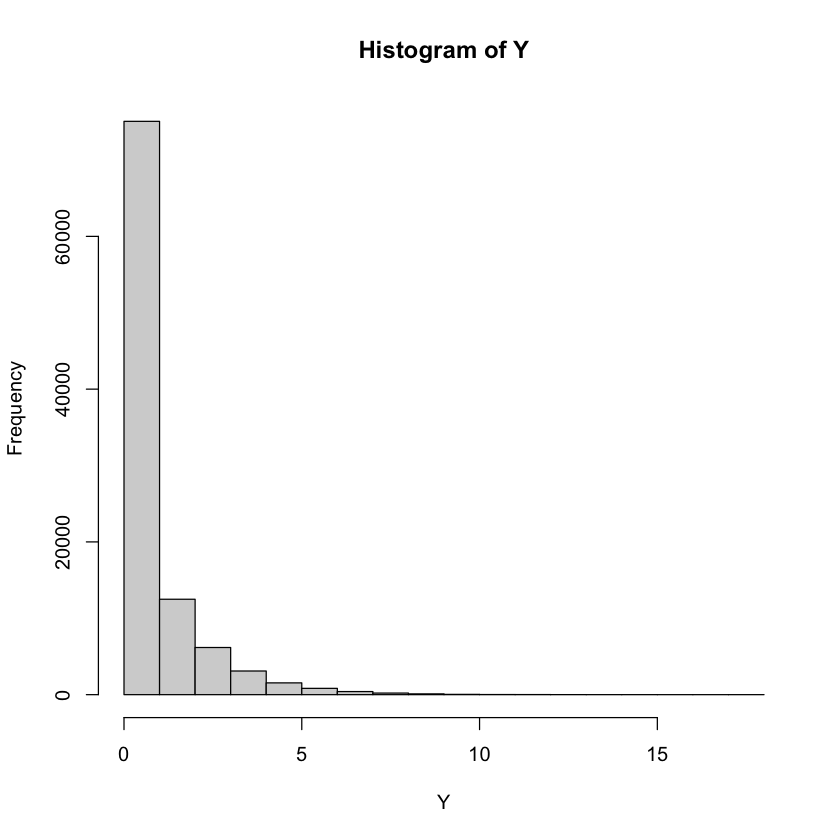

In [30]:
# (c)
Y = rpois(100000, lambda = X)
hist(Y)

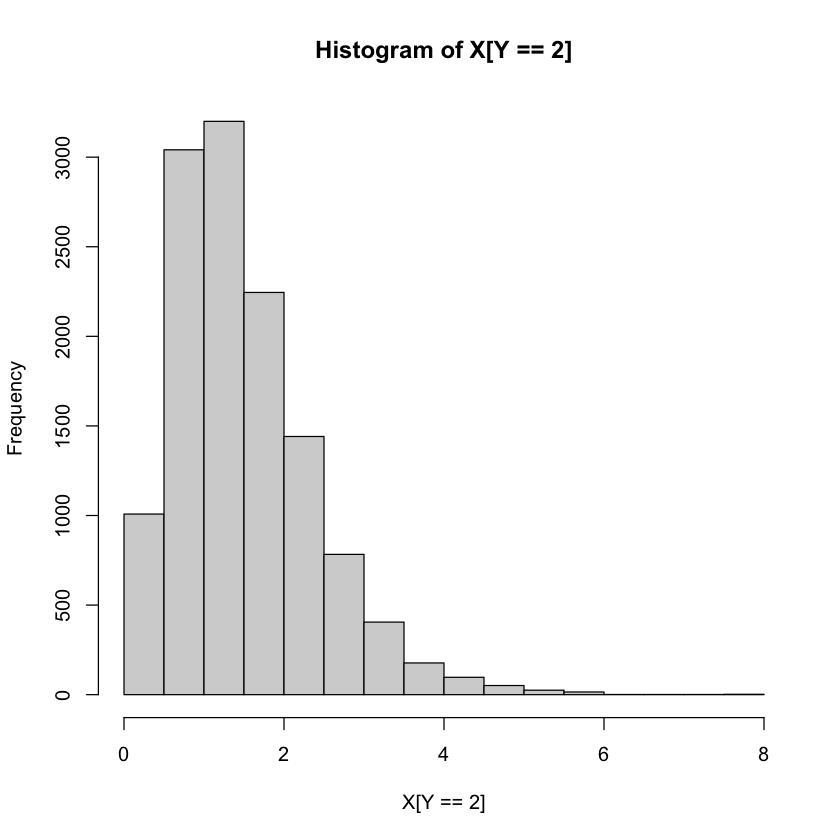

In [31]:
# (d)
hist(X[Y == 2])

## Problem-3

Suppose $X$ and $Y$ have independent standard normal distributions.  Make at least 1,000 random samples from $Z$, defined as $Z = Y|(X + Y \ge 1)$. Do you think that $Z$ has a normal distribution? What are its approximate mean and standard deviation?




[1] 0.9260422

[1] 0.7887456

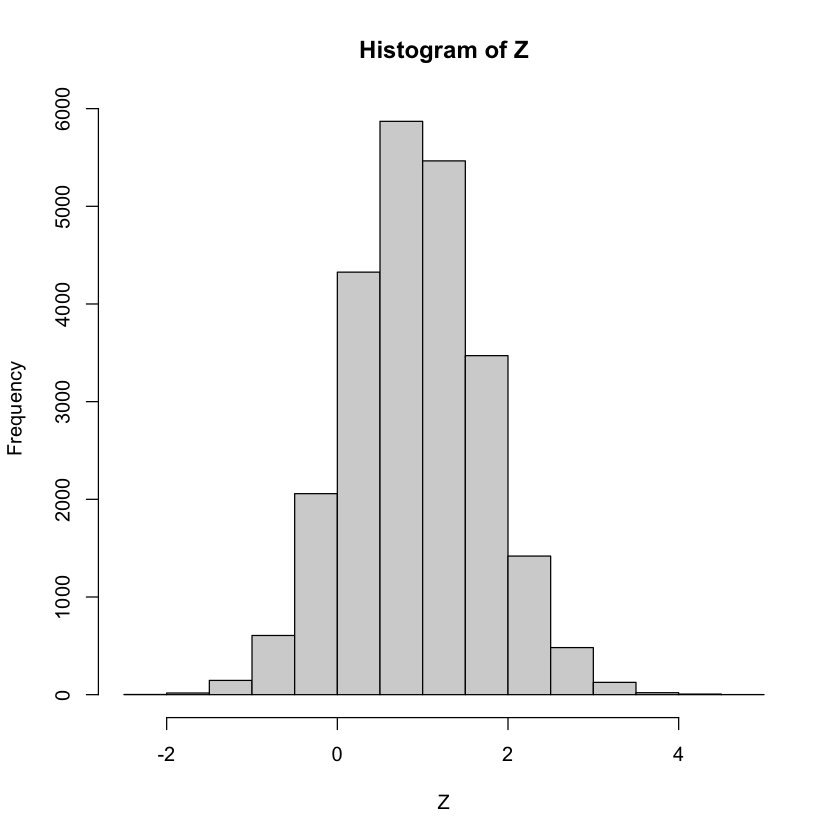

In [78]:
X = rnorm(100000,0,1)
Y = rnorm(100000,0,1)
Z = Y[X + Y >= 1]
hist(Z)
mean(Z)
sd(Z)

Looking at the distribution of Z in the plot, it seems Z has a normal distribution with mean at 0.92604217668547 and standard deviation at 0.78874557274777.

## Problem-4

Assume there are a total of 20 congressional seats up for election across the Unites States which has a multinomial distribution. We will assume that for every seat there are 3 candidates running, 1 from the Democratic party, 1 from the Republican party and 1 from an Independent party. We will also assume that for every seat there is a 45% chance the Democratic candidate will win, a 45% the Republican candidate will win and a 10% chance the Independent will win.

Let Democrat be denoted as $D$, Republican as $R$ and Independent as $I$

Use a simulation with `rmultinom` to show that $P(D = 9, R = 9, I = 2) \approx  0.0529$. Confirm your results using `dmultinom`. 




In [32]:
iter = 1000000
simul = rmultinom(iter, 20, c(0.45, 0.45, 0.10))
count = 0
for(i in 1:iter){
    if(all(simul[,i] == c(9,9,2))){
        count = count + 1
    }
}
count/iter

[1] 0.052659

In [33]:
dmultinom(c(9,9,2),20,c(0.45, 0.45, 0.10))

[1] 0.05289246

## Problem-5 

 Suppose $X = (X_1,X_2,X_3)$ has a multinomial distribution with size $n = 10$ and probabilities $p_1 = .3, p_2 = .4, p_3 = .3$. Use a simulation with `sample` (not `rmultinom`) to show that $P(X_1 = 3, X_2 = 4, X_3 = 3) \approx  0.0784$. Confirm your results using __dmultinom__. 




In [34]:
iter = 100000
s = replicate(iter,sample(c(1,2,3),10,c(0.3, 0.4, 0.3),replace = TRUE))

In [35]:
count = 0
for(i in 1:iter){
    if(all(table(factor(s[,i], levels = c(1, 2, 3)))==c(3,4,3))){
        count = count + 1
    }
}
count/iter

[1] 0.07835

In [36]:
dmultinom(c(3,4,3),10,c(0.3, 0.4, 0.3))

[1] 0.07838208

## Problem-6

Let $X_1, \dots, X_{12}$ be a random sample of size 12 from the $U(0,1)$ distribution. Explain why $Z = X_1 + X_2 + \dots + X_{12} - 6$ has an approximate standard normal distribution. You can either prove this theoretically by using CLT, or can use a simulation. \textit{You will have to find or look up the variance of a single $X_i$.}



In [43]:
k = 12
iter = 1000000
X = data.frame(matrix(nrow = iter, ncol = k))
for(i in 1:k){
    X[,i]=runif(iter) 
}
X["Z"] = rowSums(X)-6
head(X)
dim(X)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Z
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7485967,0.6481428,0.5564647,0.2494646,0.5560011,0.6091103,0.1997463,0.78638544,0.40592847,0.1216673,0.8981409,0.8395061,0.61915467
2,0.5119434,0.1565063,0.9681268,0.6875763,0.8715567,0.2951661,0.3509396,0.08707586,0.28463052,0.4757723,0.5019139,0.8915709,0.08277858
3,0.6668222,0.9581967,0.5529270,0.8034349,0.9956195,0.8668550,0.9922502,0.19309523,0.85875604,0.4474458,0.5457506,0.5579946,2.43914777
4,0.7319015,0.6752088,0.6894473,0.9388817,0.2329751,0.9973618,0.5351430,0.04272858,0.03592357,0.2729934,0.9267483,0.9977536,1.07706664
5,0.8483278,0.4200657,0.3285338,0.4494464,0.8111258,0.8192773,0.6764774,0.41308021,0.24155627,0.2932894,0.4979198,0.4523482,0.25144820
6,0.6848889,0.7963295,0.1442451,0.6903571,0.1440252,0.1770633,0.7368162,0.92250373,0.42100645,0.8308991,0.7816952,0.5755394,0.90536911


[1] 1000000      13

In [44]:
sd(X$Z)
mean(X$Z)

[1] 0.999806

[1] 0.001518866

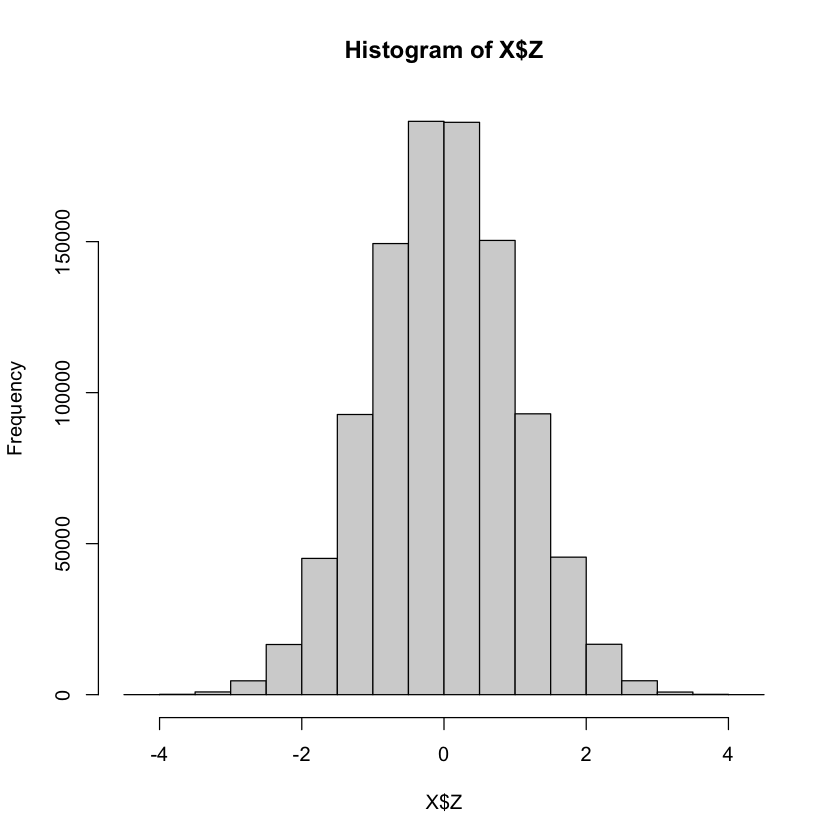

In [45]:
hist(X$Z)

As sample size is large enough, we can approximate that Z has a standard normal distribution by using central limit theorem.

## Problem-7 

Problem 4.4 #14 a (8) and b(12) in Chihara/Hesterberg.

Let $X_1, X_2, \ldots, X_9 \stackrel{\text { i.i.d. }}{\sim} N\left(7,3^2\right)$ and $Y_1, Y_2, \ldots, Y_{12} \stackrel{\text { i.i.d. }}{\sim} N\left(10,5^2\right)$. Let $W=$ $\bar{X}-\bar{Y}$.\
(a) Give the exact sampling distribution of $W$.\
(b) Simulate the sampling distribution of $W$ in $R$ and plot your results (adapt code from the previous exercise). Check that the simulated mean and the standard error are close to the theoretical mean and the standard error.\
(c) Use your simulation to find $P(W<-1.5)$. Calculate an exact answer and compare.

`Hint:`

Corollary A.2 Let $X_1, X_2, \ldots, X_n$ be independent normal random variables with common mean $\mu$ and common variance $\sigma^2$. Let $\bar{X}$ denote the sample mean. Then $\bar{X}$ is normally distributed with mean $\mu$ and variance $\left(\sigma^2 / n\right)$.

Theorem A.10 Let $X$ be a normal random variable with mean $\mu_1$ and variance $\sigma_1^2$, and let $Y$ be a normal random variable with mean $\mu_2$, and variance $\sigma_2^2$. Assume that $X$ and $Y$ are independent. Then $X \pm Y$ is a normal random variable with mean $\mu_1 \pm \mu_2$ and variance $\sigma_1^2+\sigma_2^2$



In [60]:
# (a)
# X = rnorm(9,7,3)
# Y = rnorm(12,10,5)
X_bar = rowSums(t(replicate(10000,rnorm(9,7,3))))/9
Y_bar = rowSums(t(replicate(10000,rnorm(12,10,5))))/12
W = X_bar - Y_bar

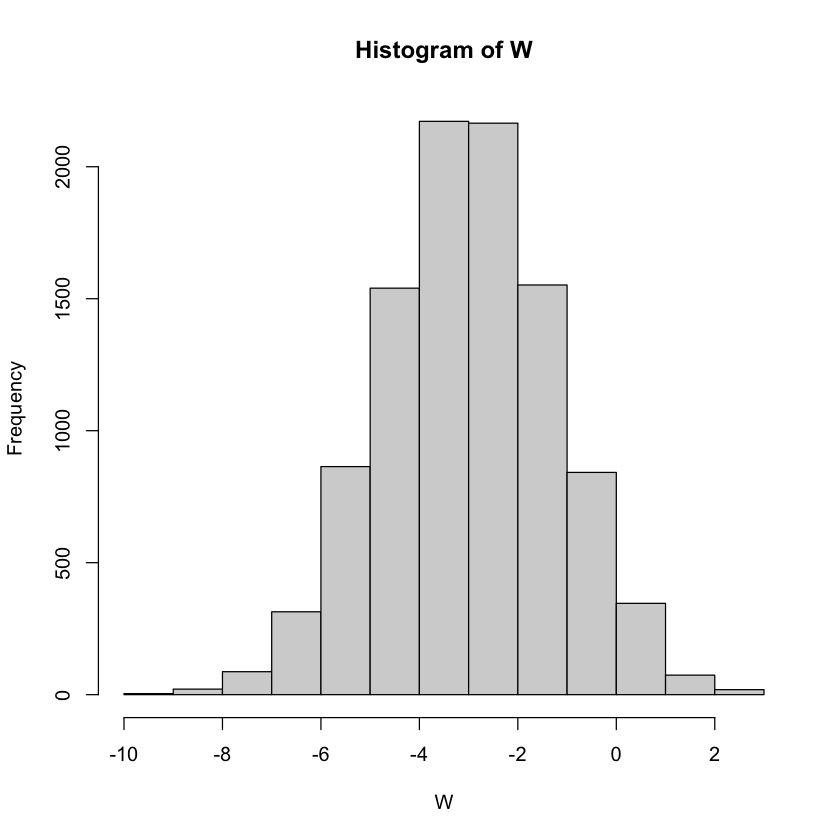

In [61]:
# (b)
hist(W)

In [65]:
cat("The theoretical mean:",mean(X_bar) - mean(Y_bar),"\n")
cat("The simulated mean:",mean(W))

The theoretical mean: -2.997381 
The simulated mean: -2.997381

In [71]:
cat("The theoretical standard error:",(var(X_bar) + var(Y_bar))^(1/2),"\n")
cat("The simulated standard error:",sd(W))

The theoretical standard error: 1.750986 
The simulated standard error: 1.753587

As stated above, the simulated mean and the standard error are close to the theoretical mean and the standard error. 

In [54]:
# (c)
cat("P(W < -1.5) =",mean(W < -1.5))

P(W < -1.5) = 0.7979

## Optional extra question 

`Don't need to submit`

__Mixtures.__ Let $Y_1$ and $Y_2$ be two random variables which have the same range $R$, and let $w_1, w_2$  probabilities with $w_1 + w_2 = 1$. Then the mixture $Y$ of $Y_1$ and $Y_2$ is defined as follows:

*  Select $X \in \{1,2\}$ at random, with $P(X = 1) = w_1, \, P(X = 2) = w_2$.

*  If $X = 1$, draw a sample $Y_1$ and set $Y = Y_1$. Otherwise, draw a sample $Y_2$ and set $Y = Y_2$.

\smallskip 

1. Suppose $E(Y_1) = \mu_1$ and $E(Y_2) = \mu_2$.  What is $E(Y|X = 1)$? What is $E(Y|X=2)$? Use this to show that $E(Y) = w_1 \mu_1 + w_2 \mu_2$. (5 Points)

2.  Suppose $var(Y_1) = \sigma_1^2$ and $var(Y_2) = \sigma_2^2$.  Explain why $E(Y^2|X = 1) = \sigma_1^2 + \mu_1^2$ and $E(Y^2|X=2) = \sigma_2^2 + \mu_2^2$. Use this to find a formula for $E(Y^2)$. 

3. Use the results of a) and b) to find a formula for $var(Y)$. 

4. Generate a sample of size 10,000 from $Y_1 \sim N(-2,1), \, Y_2 \sim N(2,2), \, w_1 = \frac{1}{3}, \, w_2 = \frac{2}{3}$ and make a probability histogram. Clearly this is not a normal distribution, and a mixture is not a sum! 